<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/unsupervised_learning/demos/01_geometry_intuition_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geometry Intuition for Unsupervised Learning

Goal:
- Visualize effect of feature scaling
- Demonstrate high-dimensional distance concentration
- Show degradation from noise dimensions
- Connect geometry to clustering reliability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

In [2]:
np.random.seed(42)

# Age-like feature
age = np.random.normal(40, 10, 200)

# Income-like feature (larger scale)
income = np.random.normal(500000, 100000, 200)

X = np.column_stack((age, income))

In [3]:
distances_unscaled = pairwise_distances(X)

print("Average pairwise distance (unscaled):",
      np.mean(distances_unscaled))

Average pairwise distance (unscaled): 109635.8941136039


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

distances_scaled = pairwise_distances(X_scaled)

print("Average pairwise distance (scaled):",
      np.mean(distances_scaled))

Average pairwise distance (scaled): 1.7605162007838973


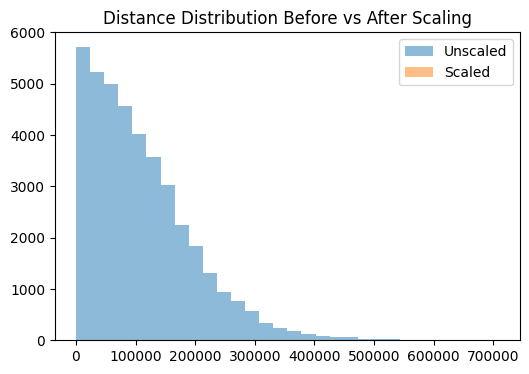

In [5]:
plt.figure(figsize=(6,4))
plt.hist(distances_unscaled.flatten(), bins=30, alpha=0.5, label="Unscaled")
plt.hist(distances_scaled.flatten(), bins=30, alpha=0.5, label="Scaled")
plt.legend()
plt.title("Distance Distribution Before vs After Scaling")
plt.show()

In [6]:
def distance_concentration(dimension):
    X = np.random.normal(0, 1, (500, dimension))
    D = pairwise_distances(X)

    min_dist = np.min(D[D > 0])
    max_dist = np.max(D)

    return min_dist / max_dist

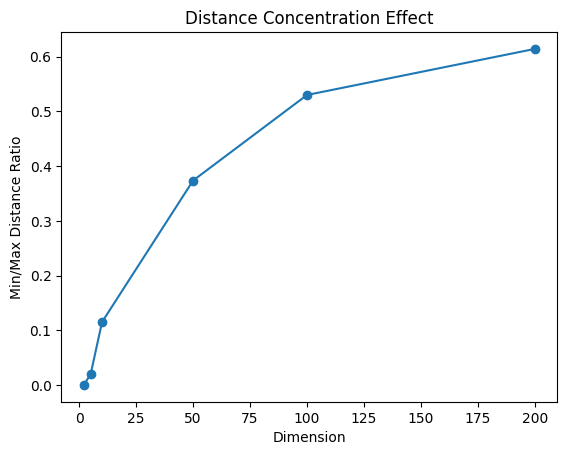

In [7]:
dimensions = [2, 5, 10, 50, 100, 200]
ratios = [distance_concentration(d) for d in dimensions]

plt.plot(dimensions, ratios, marker='o')
plt.title("Distance Concentration Effect")
plt.xlabel("Dimension")
plt.ylabel("Min/Max Distance Ratio")
plt.show()

In [8]:
from sklearn.datasets import make_blobs

X_clean, _ = make_blobs(n_samples=400, centers=3, n_features=2, random_state=42)

In [9]:
noise = np.random.normal(0, 1, (400, 50))
X_noisy = np.hstack((X_clean, noise))

In [10]:
D_clean = pairwise_distances(X_clean)
D_noisy = pairwise_distances(X_noisy)

print("Clean min/max ratio:",
      np.min(D_clean[D_clean > 0]) / np.max(D_clean))

print("Noisy min/max ratio:",
      np.min(D_noisy[D_noisy > 0]) / np.max(D_noisy))

Clean min/max ratio: 0.00015791029963841086
Noisy min/max ratio: 0.25708581905050426


In [11]:
D_clean = pairwise_distances(X_clean)
D_noisy = pairwise_distances(X_noisy)

print("Clean min/max ratio:",
      np.min(D_clean[D_clean > 0]) / np.max(D_clean))

print("Noisy min/max ratio:",
      np.min(D_noisy[D_noisy > 0]) / np.max(D_noisy))

Clean min/max ratio: 0.00015791029963841086
Noisy min/max ratio: 0.25708581905050426


Observations:

1. Scaling prevents magnitude distortion.
2. Distance concentration increases with dimension.
3. Noise features degrade clustering geometry.
4. PCA may restore structure if variance aligns with signal.
5. Geometry fundamentally shapes unsupervised results.

Unsupervised learning is geometric before algorithmic.